## Neural Networks

In [86]:
import numpy as np
np.set_printoptions(precision=4)

### Activation  Functions

In [87]:
def sigmoid(v):
    return (1 / (1+ np.exp(-v)) )
def threshold(v):
    if v < 0:
        return 0
    else:
        return 1
def tanh(v):
    return( 1-np.exp(-v) / ( 1 + np.exp(-v) ) )


### Try in simple input

In [171]:
#Example values
input_nb = 3
L1_n = 4 # nb of neurons in Layer 1
L2_n = 4 # nb of neurons in Layer 2

In [172]:
X1 = np.random.rand(input_nb)    # input is a numpy array of shape (n,), we should add +1 to the array for the bias

#matrix W1 is of shape rows = nb of cols of previous array, cols = nb of neurons we want to make
W1 = np.random.rand(input_nb +1 ,L1_n)  
W2 = np.random.rand(L1_n+1, L2_n) 

In [173]:
print("X1:",X1)
print("shape of X1" , X1.shape,"\n")
print("W1:\n", W1)
print("shape of W1:", W1.shape, "\n")
print("W2:,\n", W2)
print("shape of W2: ", W2.shape, "\n")
X2 = np.append(X,1)
print("New X:", X2)
W_i =  W1[:,0]
W_i.shape[0]

X1: [0.5462 0.9337 0.5773]
shape of X1 (3,) 

W1:
 [[0.1004 0.4405 0.7778 0.4492]
 [0.9785 0.3969 0.5089 0.1774]
 [0.9415 0.226  0.0953 0.2403]
 [0.4543 0.3244 0.2284 0.3661]]
shape of W1: (4, 4) 

W2:,
 [[0.8792 0.3352 0.0656 0.2707]
 [0.7727 0.7843 0.1014 0.3295]
 [0.9912 0.6794 0.0612 0.6775]
 [0.0012 0.7236 0.3692 0.7019]
 [0.368  0.4853 0.4494 0.2434]]
shape of W2:  (5, 4) 

New X: [0.6977 0.6783 0.609  0.1991 1.     1.     1.    ]


4

In [174]:
#Forward propagation takes an input X, a matrix representing the coeficiants of neurons, and an activation function
def forward_prop(X,W,fn=sigmoid):
    X_length = X.shape[0] #length of X 
    W_rows,W_cols = W.shape #nb of rows and columns on matrix W    
    if W_rows != X_length:
        print("Not proprtional size")
        return
    output = np.zeros(W_cols)
    for i in range(W_cols): 
        output[i] = fn( (np.dot(X, W[:,i]) )) #the sigmoid of the scalar product of X and column i of W
           
    return output

In [175]:
X1=np.append(X1,1)
Y1 = forward_prop(X1,W1,sigmoid)
Y2 = forward_prop(Y1, W2, threshold)
print(Y1)
print(Y2)

Not proprtional size
[0.8772 0.7438 0.7656 0.7142]
None


In [177]:
#Back Propagation
def back_prop(X,W,d,eta=1):
    X_length = X.shape[0] #length of X 
    y = forward_prop(X,W)
    W_rows,W_cols = W.shape #nb of rows and columns on matrix W 
    n = d.shape[0]
    
    print(y)
    e_n = np.zeros_like(y)
    for i in range(n):
        e_n[i]=d[i]-y[i] #error vector for all outputs (their nb is equal to nb of neurons of previous layer)
        
    for i in range(W_cols): #rectify values of each value of each column of W
        W_i =  W[:,i]
        for j in range(W_i.shape[0]):
            W_i[j] = W_i[j] + (eta * (e_n[i]*X[j])  )
        W[:,i] = W_i

    return W

In [178]:
desired_Y= np.array([1,1,1,0])
desired_Y

array([1, 1, 1, 0])

In [183]:
new_W1 = back_prop(X1,W1,desired_Y,1)
new_W1

[0.8867 0.8465 0.8545 0.2948]


array([[ 1.0619,  0.6642,  0.9854, -0.1019],
       [ 1.1058,  0.7794,  0.8636, -0.7647],
       [ 1.0654,  0.4625,  0.3147, -0.3422],
       [ 0.1133,  0.7341,  0.6084, -0.6429]])

In [182]:
W1[:,0] = desired_Y
W1

array([[ 1.    ,  0.5804,  0.9059,  0.0591],
       [ 1.    ,  0.6361,  0.7278, -0.4894],
       [ 1.    ,  0.3738,  0.2307, -0.172 ],
       [ 0.    ,  0.5806,  0.4629, -0.3481]])

In [ ]:
#Apply BackPropagation on the example
epochs = 0
while (epochs <5):
    back_prop(...)

##### Try with image

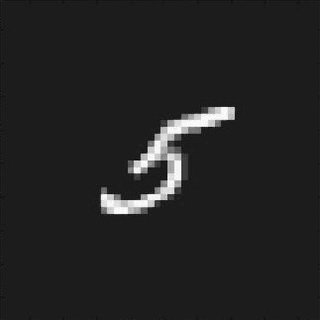

In [54]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('Handwritten-digits-from-the-MNIST-data-set-5.jpg')
display(image)

In [56]:
# convert image to numpy array
X_image = asarray(image)

In [57]:
X_image.shape

(320, 320)

In [58]:
m = X_image.shape[0] * X_image.shape [1]

##### Change shape of array to be ready for matrix muliplication

In [59]:
X_image = X_image.reshape(m)

In [60]:
X_image.shape

(102400,)

In [68]:
input_nb = m
L1_n = 16 # nb of neurons in Layer 1
L2_n = 6 # nb of neuronsin Layer 2

In [69]:
W1_image = np.random.rand(input_nb,L1_n) 
W2_image = np.random.rand(L1_n, L2_n) 

In [70]:
image_Y1 = forward_prop(X_image, W1_image, sigmoid)
image_Y2 = forward_prop(image_Y1, W2_image, sigmoid)
print(image_Y2)

[0.99859035 0.99982421 0.99876923 0.99989098 0.99950123 0.99940686]
